<a href="https://colab.research.google.com/github/nsrmhjl/ptDtSc/blob/main/sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<div dir =rtl><h1><font color = red>مقدمه ای بر کارهایی که در  biopython می توان بر روی توالی ها انجام داد؟</font></h1></div>


<div dir =rtl><p>در این دفتر یادداشت سعی می شود که شما را با Biopython آشنا کنیم. در اینجا فرض بر این است که شما  با پایتون آشنایی اولیه دارید و همچنین Biopython را بر روی سیستم خود نصب نموده اید. </p></div>

<div dir =rtl><p>از آنجا که با استفاده از google colab, شما از سیستم میزبانی شده در سرور های گوگل استفاده می کنید، بایستی هر بار این بسته را نصب نمایید:</p></div>


In [1]:
pip install Bio

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 2.3MB 8.0MB/s 


<div dir =rtl><p>برای آنکه مطمئن شوید که این بسته درست نصب شده است، ورژن آن را با دستور زیر بررسی کنید:</p></div>


In [2]:
import Bio
print(Bio.__version__)

1.78


<div dir =rtl><p>‌‌Biopython نوشته شده است تا حاوی ابزار هایی باشد که یک بیولژیست ممکن است در پایتون به دنبال آنها باشد.</p></div>
<div dir =rtl><p>چیزی که در مورد Biopython بایستی به آن توجه داشته باشید آن است که این بسته بیش از یک راه درست را برای انجام یک کار در اختیار شما قرار می دهد. به همین رو این مسئله می تواند باعث گمراهی و سردرگمی شما شود ولی از سویی دیگر این امر باعث انعطاف پذیری بالا می شود.</p></div>



##<div dir =rtl><h2><font color = blue>کار کردن با توالی ها </font></h2></div>


<div dir =rtl><p>بسیاری می اندیشند که موضوع مرکزی که در ‌bioinformatics با آن سروکار داریم، توالی ها هستند. آنچه ابتدا از یک توالی به ‌ذهن می رسد رشته ای از حروف است. </p></div>
<div dir =rtl><p>با استفاده از شیء Seq ما می توانیم در بسته Biopython یک توالی به وجود آوریم:</p></div>



In [ ]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq

In [ ]:
print(my_seq)

<div dir =rtl><p>شیء Seq با شیء رشته حروف از نظر متد هایی که در آن قرار داده شده است متفاوت است. شما نمی توانید این کارها را با یک رشته حروف ساده انجام دهید:</p></div>


In [ ]:
my_seq.complement()

In [ ]:
my_seq.reverse_complement()

<div dir =rtl><p>کلاس بعدی بسیار مهم SeqRecord است. این کلاس یک توالی را به صورت شیء Seq ذخیره می کند. اما همچنین سایر اطلاعات حاشیه ای مانند identifier, نام و توضیح را هم شامل می شود. Bio.SeqIO بخشی است که با کلاس SeqRecord کار می کند.</p></div>

##<div dir =rtl><h2><font color = blue>کار کردن با شیء توالی</font></h2></div>


<div dir =rtl><p>ما می توانیم از بسیاری جهات با توالی ها مانند رشته حروف رفتار کنیم. به عنوان مثال:</p></div>

In [ ]:
for index, letter in enumerate(my_seq):
  print("%i %s" % (index, letter))

<div dir =rtl><p>و یا:</p></div>


In [ ]:
print(len(my_seq))

<div dir =rtl><p>شما همچنین می توانید به هر یک از اجزای توالی، درست مانند اجزای رشته حروف، دسترسی دارید:</p></div>

In [ ]:
print(my_seq[0])

In [ ]:
print(my_seq[2])

In [ ]:
print(my_seq[-1])

<div dir =rtl><p>شما می توانید درست مانند یک رشته توالی، تعداد بروز یک الگو را در توالی شمارش کنید:</p></div>


In [ ]:
"AAAA".count("AA")

In [ ]:
Seq("AAAA").count("AA")

<div dir =rtl><p>توجه داشته باشید که این متد توالی را به صورت غیر هم پوشاننده جستجو می نماید. اما این مسله در هنگامی که شما فقط به دنبال یک الگوی تک حرفی هستید مشکلی ایجاد نمی کند. مثلا هنگامی که به دنبال تعیین درصد GC در توالی DNA‌هستید:</p></div>


In [ ]:
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
100 * float(my_seq.count("G") + my_seq.count("C")) / len(my_seq)

<div dir =rtl><p>توجه داشته باشید که ماجول Bio.SeqUtils دارای توابعی برای  GC هست که به صورت خودکار  نوکلوئوتید مبهم S که به معنی G یا C است را  نیز محاسبه می کند:</p></div>


In [ ]:
from Bio.SeqUtils import GC
GC(my_seq)

###<div dir =rtl><h3><font color = green>تکه کردن توالی:</font></h3></div>


<div dir =rtl><p>به یاد داشته باشید که شیء Seq از قواعد اندکس کردن در پایتون پیروی می کند. به هنگام تکه نمودن توالی نیز مانند پایتون، اولین اندکس در تکه جدا شده شامل (در اینجا ۴) می شود اما دومین   اندکس از آن خارج می ماند (در اینجا ۱۲).</p></div>


In [ ]:
my_seq[4:12]

<div dir =rtl><p>شما در تکه کردن یک توالی می توانید یک شروع، یک پایان و یک مقدار برای جا انداختن داشته باشید:</p></div>


In [ ]:
my_seq

In [ ]:
my_seq[0::3]

In [ ]:
my_seq[1::3]

In [ ]:
my_seq[2::3]

<div dir =rtl><p>همینطور می توانید با استفاده از یکی از شگرد های پایتون توالی را برعکس کنید:</p></div>


In [ ]:
my_seq[::-1]

###<div dir =rtl><h3><font color = green>اضافه کردن توالی ها به هم:</font></h3></div>

<div dir =rtl><p>در این مورد  توالی ها مانند رشته حروف رفتار می کنند:</p></div>


In [ ]:
seq1 = Seq("ACGT")
seq2 = Seq("AACC")
seq3 = Seq("GGTT")
seq1 + seq2 + seq3

In [ ]:
list_of_seqs = [Seq("ACGT"), Seq("AACC"), Seq("GGTT")]
concatenated = Seq("")
for s in list_of_seqs:
  concatenated += s
concatenated

###<div dir =rtl><h3><font color = green>رونویسی:</font></h3></div>


<div dir =rtl><p>در شکل زیر سعی شده است که آنچه در هنگام رونویسی در بیولوژی رخ می دهد نشان داده شود:</p></div>


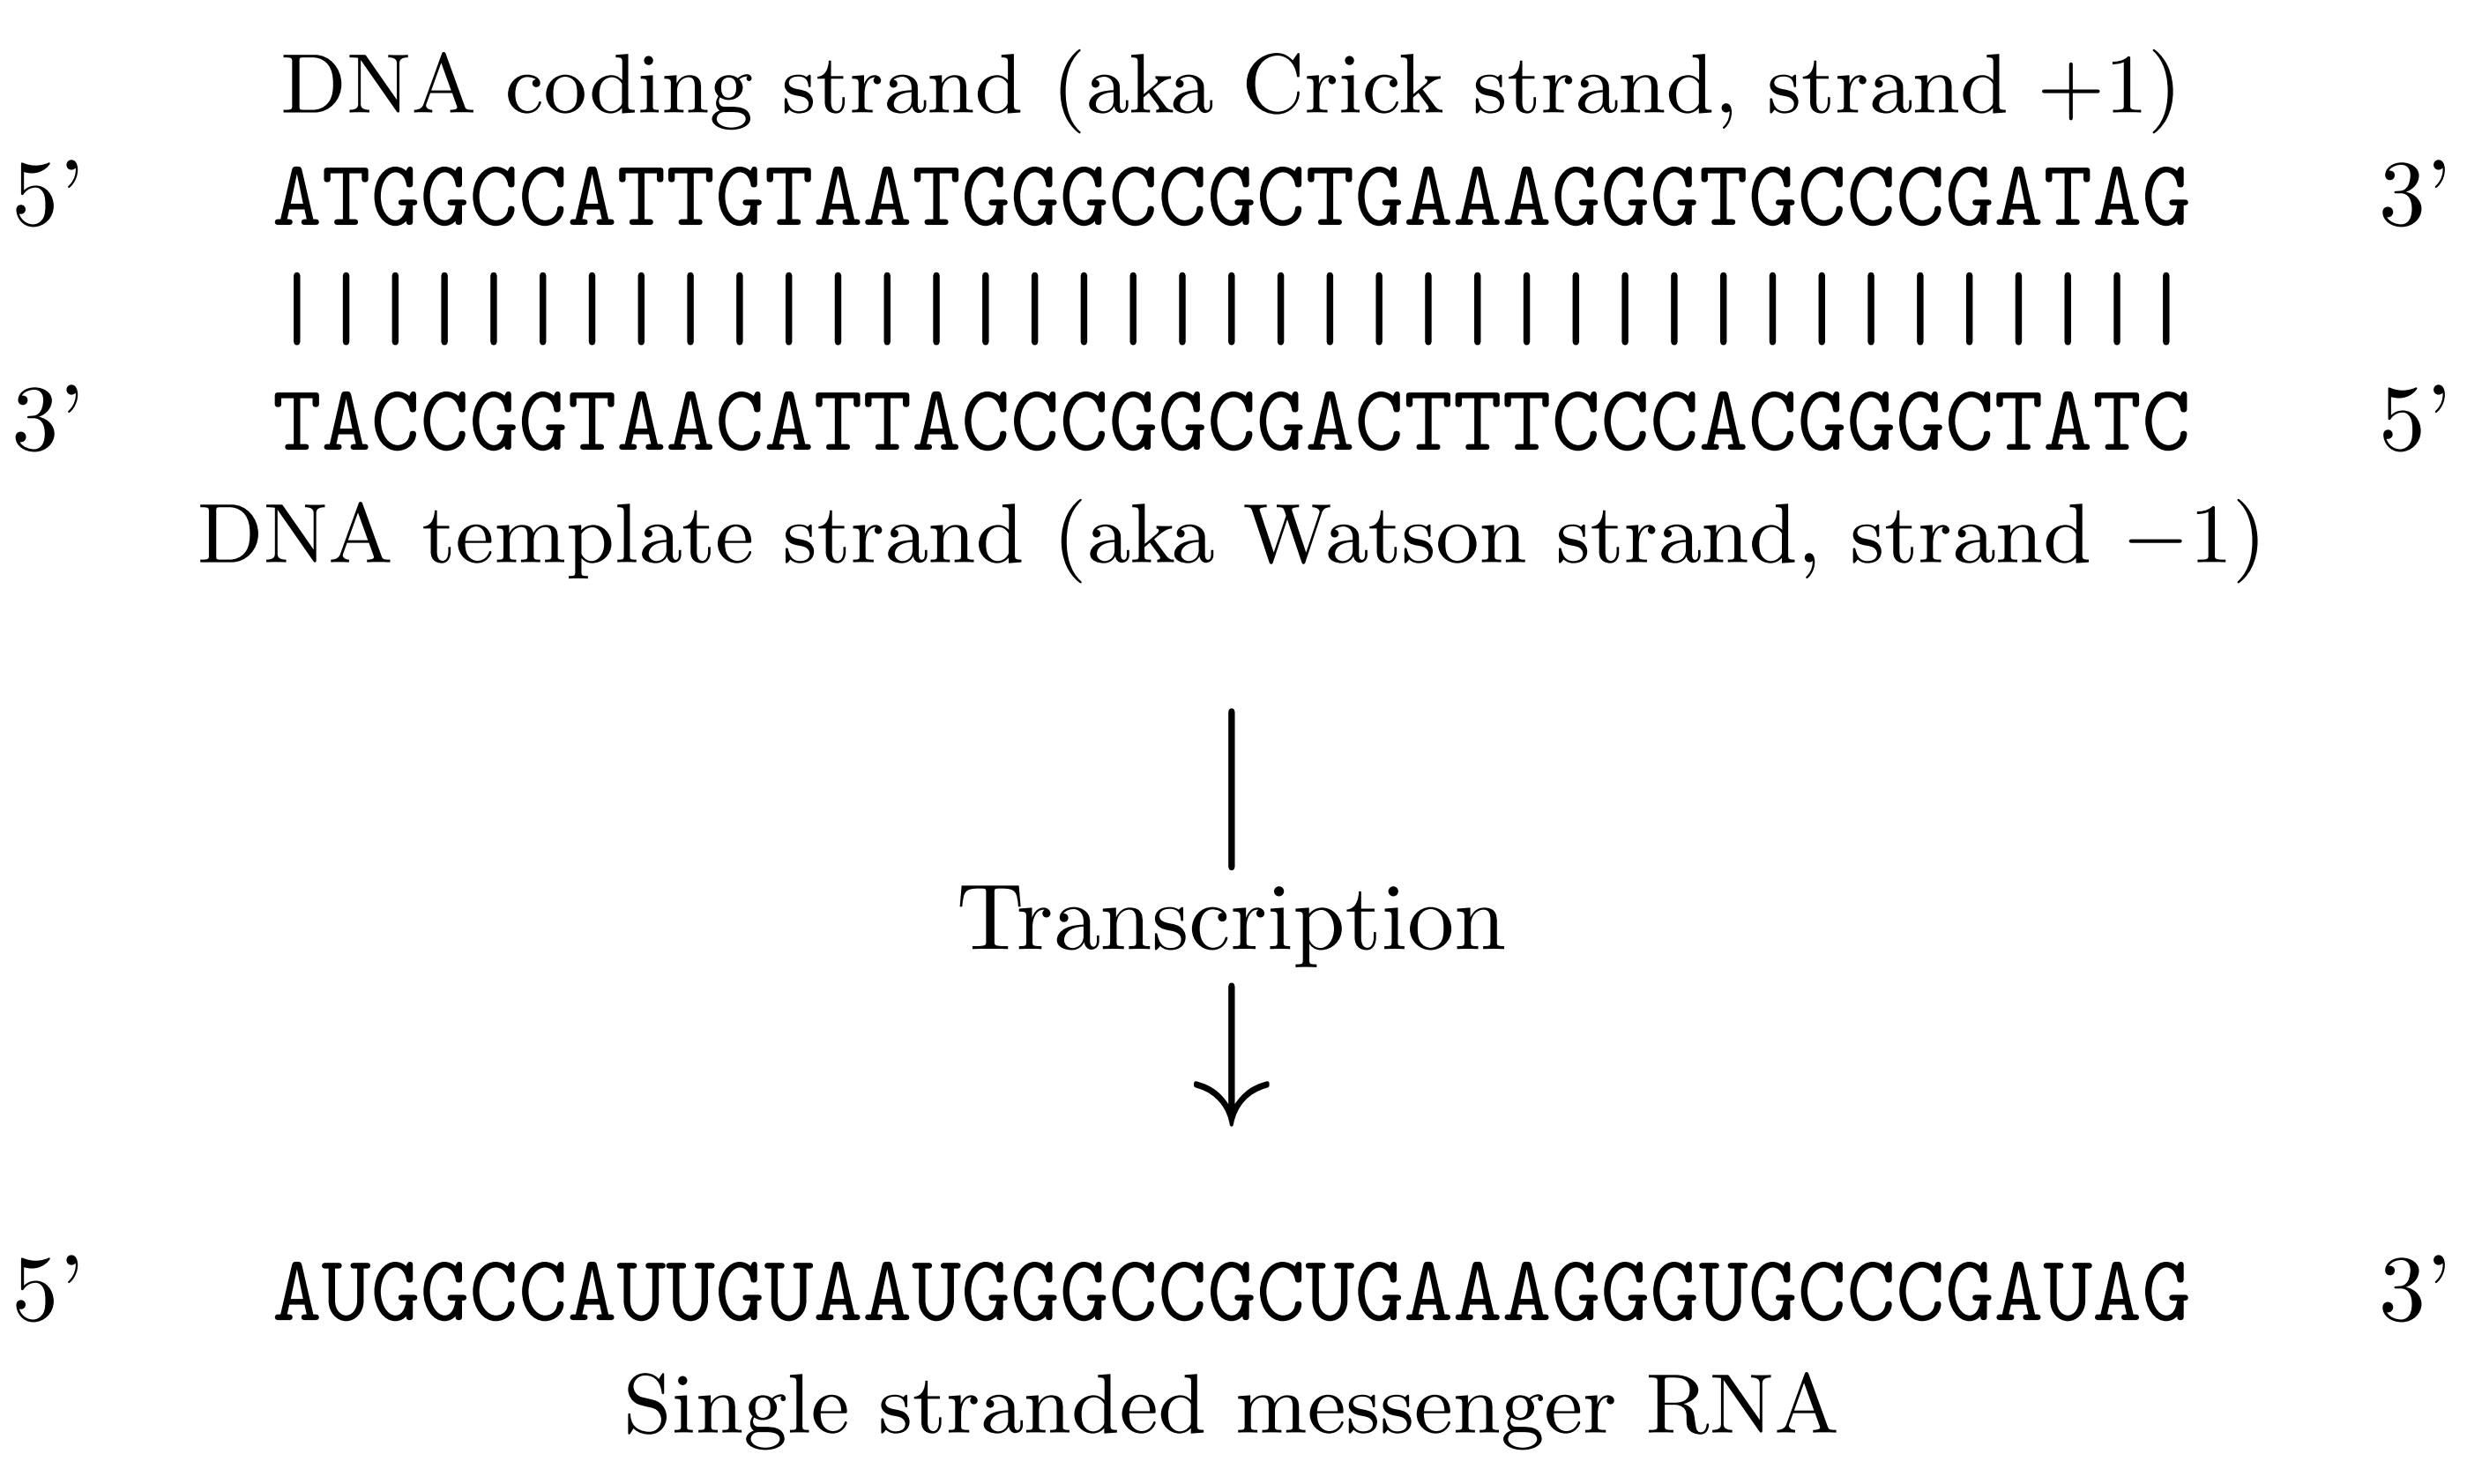

<div dir =rtl><p>آنچه در واقع به هنگام نسخه برداری اتفاق می افتد این است که از رشته مکمل (DNA template strand) یک رشته RNA برعکس مکمل ساخته می شود (TCAG -> CUGA) اما در Biopython ما از رشته دیگر  (DNA coding strand) استفاده می کنیم و فقط T را با U جایگزین می نماییم.</p></div>


In [ ]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
coding_dna

In [ ]:
template_dna = coding_dna.reverse_complement()
template_dna

In [ ]:
messenger_rna = coding_dna.transcribe()
messenger_rna

<div dir =rtl><p>اگر بخواهید این کار را به همان طریقی که در طبیعت انجام می شود پیش ببرید، نیاز به دو مرحله است:</p></div>


In [ ]:
messenger_rna = coding_dna.transcribe()
messenger_rna

<div dir =rtl><p>شیء Seq همچنین متدی دارد که امکان نسخه برداری معکوس را به ما می دهد. در اینجا نیز تنها U با T عوض می شود:</p></div>

In [ ]:
messenger_rna.back_transcribe()

###<div dir =rtl><h3><font color = green>ترجمه</font></h3></div>


<div dir =rtl><p>در اینجا هم از یکی از متد های موجود در شیء Seq  استفاده می کنیم:</p></div>


In [ ]:
messenger_rna.translate()

<div dir =rtl><p>ما همچنین می توانیم مستقیما از روی رشته کد کننده DNA ترجمه کنیم:</p></div>


In [ ]:
coding_dna.translate()

<div dir =rtl><p>همانگونه که مشاهده می کنید علاوه بر کدن توقف در انتهای پپتید، یک کدون توقف هم در میانه پپتید وجود دارد. این کار به صورت عمدی انجام شده تا بحث در باره بعضی از گزینه ها مانند جداول ترجمه را پیش بکشد.</p></div>
<div dir =rtl><p>Biopython از جداول ترجمه **[NCBI](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi)** استفاده می کند. به صورت پیشفرض، Biopython از کد ژنتیکی استاندارد استفاده می کند. در صورت نیاز به استفاده از کدی دیگر، این گزینه بایستی به صورت نشانوند به متد ترجمه داده شود:</p></div>



In [ ]:
coding_dna.translate(table="Vertebrate Mitochondrial")

<div dir =rtl><p>می توان به جای نوشتن نام جدول، شماره آن را در NCBI نوشت که در توضیحات فایل های gbk آمده است:</p></div>


In [ ]:
coding_dna.translate(table=2)

##<div dir =rtl><h2><font color = blue>تجزیه فرمت فایل های توالی ها</font></h2></div>
<div dir =rtl><p>قسمت بزرگی از Bioinformatic با فایل های مختلفی سرو کار دارد که برای ذخیره انواع داده های زیستی طراحی شده اند. یکی از چالش ها در کار کردن با این داده ها در زبان های برنامه نویسی، این است که چگونه آنها را تجزیه یا parse نماییم که بتوانیم با داده های موجود در آنها کار کنیم. یکی از عوامل سردرگمی در اینجا این است که این فرمت ها به طور مرتب عوض می شوند و کوچکترین تغییر می تواند بهترین  توابع نوشته شده برای تجزیه فایل و یا parser ها را از کار بیاندازند. </p></div>
<div dir =rtl><p>در اینجا از ماجول Bio.SeqIO استفاده می کنیم. و درنتیجه به  طور خودکار، از شیء SeqRecord  استفاده می کنیم که حاوی شیء Seq است.</p></div>
<div dir =rtl><p>در صورت استفاده از فایل های با حجم بسیار بالا با فرمت FASTA و FASTQ اجرای کد بسیار کند می شود و در این موارد بایستی از تجزیه کننده های دیگری مانند SimpleFastaParser و یا FastqGeneralIterator استفاده کنید که برای هر رکورد تنها یک تاپل چند خطی وارد حافظه می کنند.</p></div>


###<div dir =rtl><h3><font color = green>تجزیه (parse) ساده فایل های  FASTA</font></h3></div>


<div dir =rtl><p>به منظور تمرین در اینجا فایلی قرار داده شده. این فایل را در آدرسی که فایل دفتر یادداشت نیز در آن قرار دارد کپی نموده و سپس دستورات زیر را برای تجزیه آن اجرا نمایید:</p></div>

In [3]:
from Bio import SeqIO
for seq_record in SeqIO.parse("/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.fasta", "fasta"):
  print(seq_record.id)
  print(repr(seq_record.seq))
  print(len(seq_record))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
gi|2765648|emb|Z78523.1|CHZ78523
Seq('CGTAACCAGGTTTCCGT

###<div dir =rtl><h3><font color = green>تجزیه (parse) ساده فایل های  gbk</font></h3></div>


In [ ]:
for seq_record in SeqIO.parse("/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.gbk", "genbank"):
  print(seq_record.id)
  print(repr(seq_record.seq))
  print(len(seq_record))

<div dir =rtl><p>اگر شما تنها از هر رکورد موجود در فایل، identifier را بخواهید، می توانید مانند مثال زیر عمل نمایید:</p></div>

In [ ]:
identifiers = [seq_record.id for 
               seq_record in 
               SeqIO.parse("/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.gbk",
                                         "genbank")]
identifiers

###<div dir =rtl><h3><font color = green>تکرار در  طول فایل:</font></h3></div>



In [ ]:
record_iterator = SeqIO.parse("/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.fasta", "fasta")
first_record = next(record_iterator)
print(first_record.id)
print(first_record.description)

In [ ]:
second_record = next(record_iterator)
print(second_record.id)
print(second_record.description)

In [ ]:
third_record = next(record_iterator)
print(third_record.id)
print(third_record.description)

###<div dir =rtl><h3><font color = green>استخراج داده:</font></h3></div>
<div dir =rtl><p></p></div>

<div dir =rtl><p>دوباره فایل gbk را در نظر بگیرید:</p></div>


In [ ]:
record_iterator = SeqIO.parse(
    "/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.gbk", 
    "genbank")
first_record = next(record_iterator)
print(first_record)

<div dir =rtl><p>فرض کنید تمام اطلاعات حاشیه ای اولین رکورد را می خواهید:</p></div>

In [ ]:
print(first_record.annotations)

<div dir =rtl><p>همانطور که مشاهده می کنید ساختار داده یک دیکشنری است و مانند هر دیکشنری دیگری در پایتون ما می توانیم کلیدها و مقادیر را استخراج نماییم:</p></div>


In [ ]:
print(first_record.annotations.keys())
print(first_record.annotations.values())

<div dir =rtl><p>فرض کنید ما لیستی از گونه هایی می خواهیم که توالی های موجود در فایل از آنها گرفته شده اند. می دانیم این اطلاعات در دیکشنری اطلاعات حاشیه ای، و در کلید های source و organism ذخیره می شوند:</p></div>


In [ ]:
print(first_record.annotations["source"])
print(first_record.annotations["organism"])

<div dir =rtl><p>حالا اگر این اطلاعات را برای تمام توالی های موجود در فایل بخواهیم بایستی یک حلقه for بنویسیم:</p></div>


In [ ]:
all_species = []
for seq_record in SeqIO.parse(
    "/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.gbk", 
    "genbank"):
  all_species.append(seq_record.annotations["organism"])
print(all_species)

<div dir =rtl><p>و یا:</p></div>


In [ ]:
all_species = [
seq_record.annotations["organism"]
for seq_record in SeqIO.parse(
    "/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.gbk", 
    "genbank")
]
print(all_species)

<div dir =rtl><p>در مورد فایل های FASTA کار به این سادگی نیست. با مرور فایل خواهید دید که اطلاعات مورد نظر ما در دومین بخش اطلاعات حاشیه ای قرار دارد. به همین سبب:</p></div>

In [ ]:
all_species = []
for seq_record in SeqIO.parse(
    "/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/ls_orchid.fasta", 
    "fasta"):
  all_species.append(seq_record.description.split()[1])
print(all_species)

###<div dir =rtl><h3><font color = green>تجزیه اطلاعات توالی ها از اینترنت</font></h3></div>


<div dir =rtl><p>Biopython می تواند توالی ها را از پایگاه های داده آنلاین دانلود نماید. اما این به آن معنی نیست که شما هر بار این کار را تکرار کنید. شما بایستی یک بار توالی را دانلود کنید و سپس برای کاربرد های بعدی آن را در یک فایل ذخیره نمایید. برای برای تجزیه فایل های توالی از پایگاه داده NCBI به ماجول Entrez نیاز دارید:</p></div>


In [ ]:
from Bio import Entrez

In [ ]:
Entrez.email = "nasirmohajel@gmail.com"

In [ ]:
handle = Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text", id="AY851612")

In [ ]:
seq_record = SeqIO.read(handle, "fasta")

In [ ]:
seq_record.description

<div dir =rtl><p>ماجول Enterz به شما اجازه می دهد توالی را در فرمت های دیگری نیز تجزیه نمایید. به عنوان مثال فرمت gbk:</p></div>



In [ ]:
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="AY851612")

In [ ]:
seq_record = SeqIO.read(handle, "gb")

In [ ]:
seq_record.description

##<div dir =rtl><h2><font color = blue>نوشتن فایل های توالی:</font></h2></div>


<div dir =rtl><p>ماجول ‌Bio.SeqIO هم برای تجزیه و هم برای نوشتن شیء های SeqRecord. برای آنکه این عمل را امتحان کنیم، نیاز است تا چند هدد از این شیء را ایجاد نماییم:</p></div>

In [18]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [19]:
rec1 = SeqRecord(
    Seq("MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
        "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
        "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
        "SSAC",),
        id="gi|14150838|gb|AAK54648.1|AF376133_1",
        description="chalcone synthase [Cucumis sativus]",
        )
rec2 = SeqRecord(
    Seq("YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ"
    "DMVVVEIPKLGKEAAVKAIKEWGQ",
    ),id="gi|13919613|gb|AAK33142.1|",
    description="chalcone synthase [Fragaria vesca subsp. bracteata]",
    )
rec3 = SeqRecord(
    Seq(
        "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC"
        "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP"
        "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN"
        "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
        "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW"
        "IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT"
        "TGEGLEWGVLFGFGPGLTVETVVLHSVAT",
        ),
        id="gi|13925890|gb|AAK49457.1|",
        description="chalcone synthase [Nicotiana tabacum]",
)


<div dir =rtl><p>سپس یک لیست از شیء های ساختع شده تعریف می کنیم:</p></div>

In [20]:
my_records = [rec1, rec2, rec3]

<div dir =rtl><p>حالا از SeqIO.write استفاده می کنیم تا این لیست را به صورت یک فایل بنویسیم:</p></div>

In [21]:
SeqIO.write(my_records, 
            "/content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/my_example.faa", 
            "fasta")

3

In [22]:
!cat /content/drive/MyDrive/us/workshop/learn_python/python.for.data.science/NM/my_example.faa


>gi|14150838|gb|AAK54648.1|AF376133_1 chalcone synthase [Cucumis sativus]
MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD
GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK
NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM
SSAC
>gi|13919613|gb|AAK33142.1| chalcone synthase [Fragaria vesca subsp. bracteata]
YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ
DMVVVEIPKLGKEAAVKAIKEWGQ
>gi|13925890|gb|AAK49457.1| chalcone synthase [Nicotiana tabacum]
MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC
EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP
KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN
NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV
SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW
IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT
TGEGLEWGVLFGFGPGLTVETVVLHSVAT
